# Gradient Descent Example (Rollercoaster Ride)

In [83]:
import torch
import matplotlib.pyplot as plt
import fastai.torch_core

Generate data that kind of represents the speed of a rollarcoaster going over a hump 

In [84]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19.])

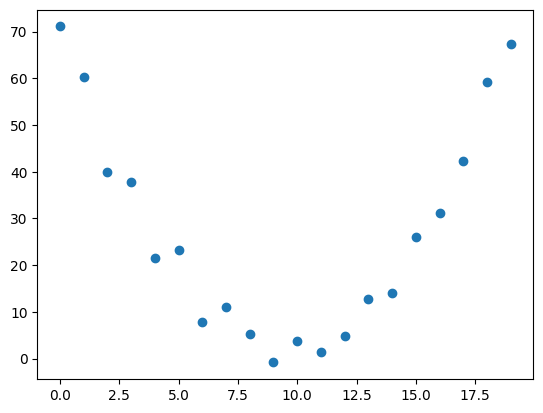

In [85]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

We're going to limit the problem to finding the best QUADRATIC equation by making a function we can run values through:

In [86]:
def f(t, params):
    a,b,c = params
    return a*(t**2)+(b*t)+c

We also need to define loss and for continuous data, it's common to use "mean squared error":

In [87]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

Step 1: Initialize Parameters

In [88]:
params = torch.randn(3).requires_grad_(); params

tensor([-0.1748, -1.2540,  1.4814], requires_grad=True)

Step 2: Calculate the predictions

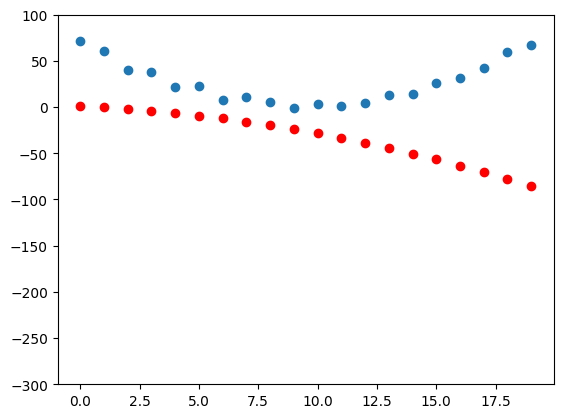

In [89]:
preds = f(time, params)

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, fastai.torch_core.to_np(preds), color='red')
    ax.set_ylim(-300,100)
    
show_preds(preds)

Step 3: Calculate the loss

In [90]:
loss = mse(preds, speed)
loss

tensor(70.0767, grad_fn=<SqrtBackward0>)

Step 4: Calculate the gradients

In [91]:
loss.backward()
# choosing a learning rate of 1e-3 for now
params.grad, params.grad * 1e-4

(tensor([-155.7314,  -10.1095,   -0.8424]),
 tensor([-1.5573e-02, -1.0110e-03, -8.4239e-05]))

Step 5: Step the weights

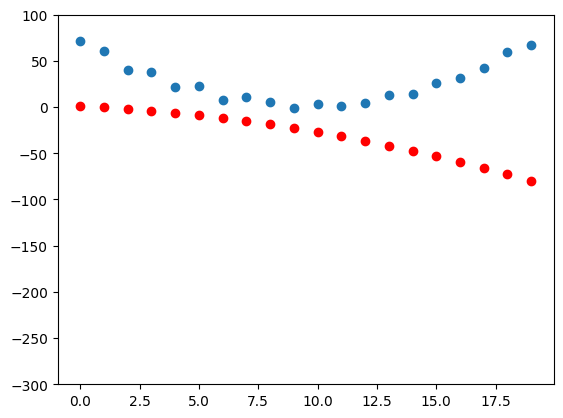

In [92]:
lr = 1e-4
params.data -= lr * params.grad.data
params.grad = None
preds = f(time, params)
mse(preds, speed)
show_preds(preds)

In [93]:
# Repeat this a few times
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

Step 6: Repeat the process

In [94]:
for i in range(99999): apply_step(params)

67.64822387695312
65.24887084960938
62.88160705566406
60.54966354370117
58.25665283203125
56.00657653808594
53.80386734008789
51.65339660644531
49.56047058105469
47.5308837890625
45.57082748413086
43.68685531616211
41.8857536315918
40.17442321777344
38.559593200683594
37.04759979248047
35.644012451171875
34.35325241088867
33.1782341003418
32.12002944946289
31.177642822265625
30.347925186157227
29.625686645507812
29.00395965576172
28.474397659301758
28.027774810791016
27.65448570251465
27.345001220703125
27.09022331237793
26.881771087646484
26.71210479736328
26.574617385864258
26.4636173248291
26.3742618560791
26.30251693725586
26.24502182006836
26.199026107788086
26.162277221679688
26.1329402923584
26.109542846679688
26.090896606445312
26.076040267944336
26.064210891723633
26.054790496826172
26.047290802001953
26.041322708129883
26.036569595336914
26.03278160095215
26.029767990112305
26.027368545532227
26.02545166015625
26.02392578125
26.022705078125
26.021730422973633
26.0209522247314

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

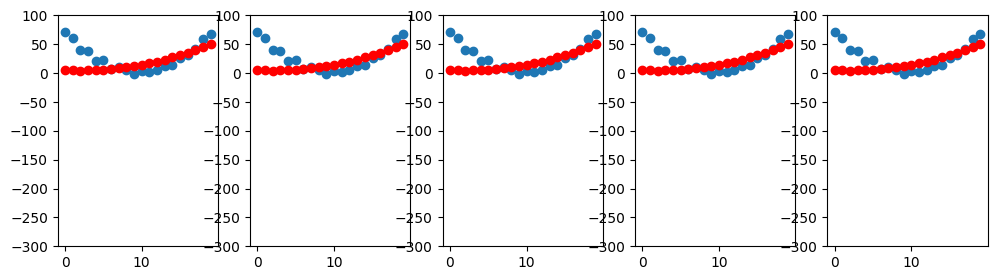

In [95]:
_,axs = plt.subplots(1,5,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout